## About the Data

**Goal**:  In this NLP project I will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.
+ Yelp is review Website.
+ Each observation in this dataset is a review of a particular business by a particular user.
+ The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
+ The "cool" column is the number of "cool" votes this review received from other Yelp users.
+ All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
+ The "useful" and "funny" columns are similar to the "cool" column.
+ Ok let's start analysis

## Importing Libraries

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data

In [12]:
df = pd.read_csv('yelp.csv')
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [13]:
df.shape

(10000, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


## EDA

In [4]:
df.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
df['stars'].nunique()

5

In [8]:
df['cool'].nunique()

29

In [9]:
df['funny'].nunique()

29

In [14]:
df = df.drop(['business_id', 'review_id', 'user_id'], axis = 1)

In [15]:
df.shape

(10000, 7)

In [16]:
df

,date,stars,text,type,cool,useful,funny
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,2,5,0
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,0,0
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,0,1,0
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,1,2,0
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0
...,...,...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,review,1,2,0
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,review,0,0,0
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,review,0,0,0
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,review,0,0,0


In [17]:
df['type'].nunique()

1

In [19]:
df = df.drop('type', axis = 1)

In [20]:
df.shape

(10000, 6)

<AxesSubplot:>

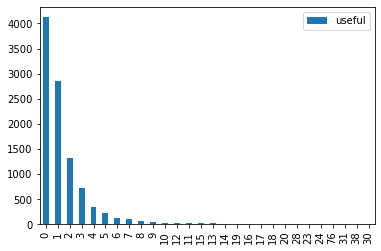

In [45]:
useful = pd.DataFrame(df['useful'].value_counts())
useful.plot(kind = 'bar')

In [21]:
df['text_length'] = df['text'].apply(len)

In [22]:
df

,date,stars,text,cool,useful,funny,text_length
0,2011-01-26,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,0,1345
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469
...,...,...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,1,2,0,668
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,0,0,0,881
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,0,0,0,1425
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,0,0,0,880


<AxesSubplot:>

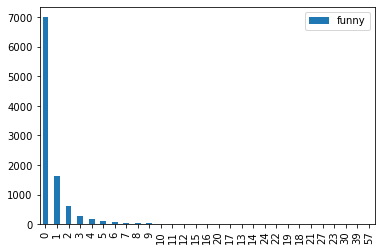

In [46]:
funny = pd.DataFrame(df['funny'].value_counts())
funny.plot(kind = 'bar')

<AxesSubplot:xlabel='stars', ylabel='text_length'>

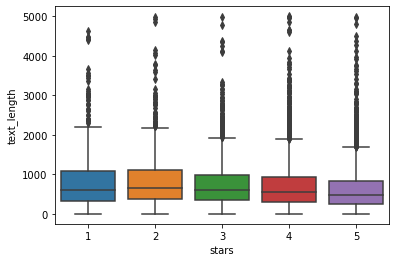

In [28]:
sns.boxplot('stars','text_length', data = df)

<AxesSubplot:xlabel='stars', ylabel='count'>

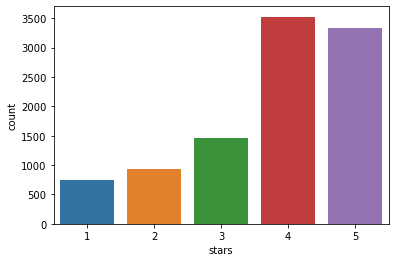

In [33]:
sns.countplot('stars', data = df)

<AxesSubplot:xlabel='stars', ylabel='text_length'>

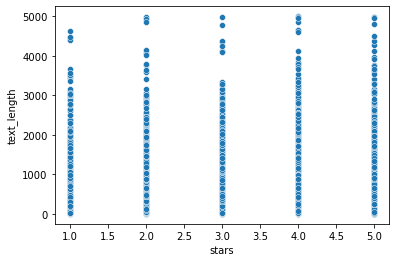

In [48]:
sns.scatterplot('stars', 'text_length', data = df)

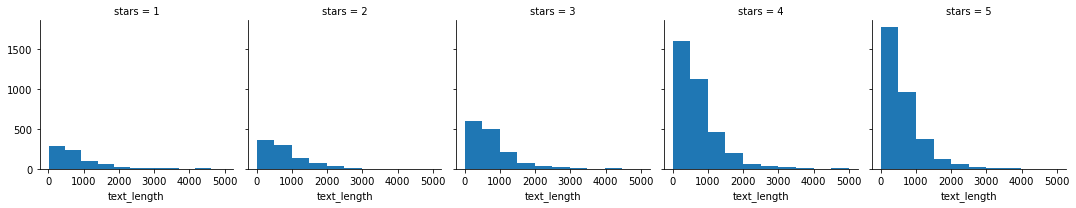

In [37]:
g = sns.FacetGrid(df, col = 'stars')
g.map(plt.hist, 'text_length')

<AxesSubplot:>

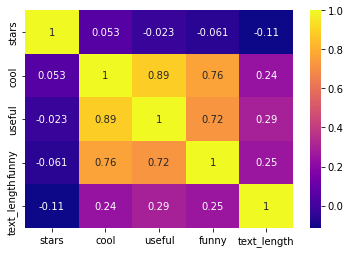

In [38]:
sns.heatmap(df.corr(), annot = True, cmap = 'plasma')

In [49]:
df.groupby('stars').mean()

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


<AxesSubplot:>

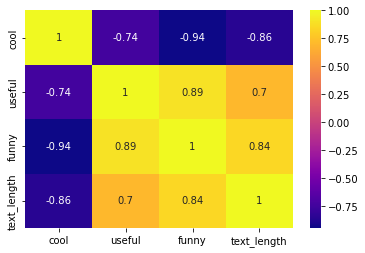

In [54]:
sns.heatmap(df.groupby('stars').mean().corr(), cmap = 'plasma', annot = True)

## NLP

In [106]:
df_class = df[(df.stars==1)|(df.stars==5)]  

In [107]:
X = df_class['text']
y = df_class['stars']

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

In [109]:
cv = CountVectorizer()

In [110]:
X = cv.fit_transform(X)  # Converting text into vector form

### Modelling

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)

In [87]:
X_train.shape

(2737, 19183)

In [88]:
X_test.shape

(1349, 19183)

### 1.0 Decision Tree Classifier

In [89]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [90]:
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           1       0.62      0.62      0.62       247
           5       0.91      0.91      0.91      1102

    accuracy                           0.86      1349
   macro avg       0.77      0.77      0.77      1349
weighted avg       0.86      0.86      0.86      1349



[[ 153   94]
 [  94 1008]]


### 2.0 Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [94]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [95]:
pred = rfc.predict(X_test)

In [96]:
print(classification_report(y_test, pred))  ## Model evaluation

              precision    recall  f1-score   support

           1       0.96      0.20      0.33       247
           5       0.85      1.00      0.92      1102

    accuracy                           0.85      1349
   macro avg       0.90      0.60      0.63      1349
weighted avg       0.87      0.85      0.81      1349



In [97]:
print(confusion_matrix(y_test, pred))

[[  50  197]
 [   2 1100]]


### 3.0 Naive Bayes Classifier

In [98]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [99]:
nb.fit(X_train, y_train)

MultinomialNB()

In [100]:
pred = nb.predict(X_test)

In [101]:
print(classification_report(y_test, pred))  # Model Evaluation

              precision    recall  f1-score   support

           1       0.85      0.68      0.76       247
           5       0.93      0.97      0.95      1102

    accuracy                           0.92      1349
   macro avg       0.89      0.83      0.85      1349
weighted avg       0.92      0.92      0.92      1349



## Thank You